## Problem 2 - Plotting temperatures (7 points)

In this problem we will  plot monthly mean temperatures from the Helsinki-Vantaa airpot for the past 30 years.

The final output should look like this:
![line plot](img/temp_line_plot.png)

## Input data

File `data/helsinki-vantaa.csv` monthly average temperatures from Helsinki Vantaa airport. Column descriptions:

- `DATE`: YEAR-MONTH-DAY (the time stamp contains the first day of each month, but values in other columns are average values for the whole month!)
- `USAF`: Station number
- `TEMP_F`: Monthly mean temperature in Fahrenheit 
- `TEMP_C`: Monthly mean temperature in Celsius
- `REF_TEMP_C`: Long term average in Celsius (for the period 1988-2018)
- `DIFF_C`: Difference between monthly mean and long term average in Celsius


### Steps

1. Load the Helsinki temperature data (`data/helsinki-vantaa.csv`):
    - read the data into variable called `data` using pandas
    - Parse dates from the column `'DATE'` and set the dates as index in the data frame 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fp = 'data/helsinki-vantaa.csv'
data = pd.read_csv(fp, sep=',', parse_dates=['DATE'], index_col='DATE')
data.head()

,USAF,TEMP_F,TEMP_C,REF_TEMP_C,DIFF_C
DATE,,,,,
1952-01-01,29740.0,28.347826,-2.028986,-4.93665,2.907665
1953-01-01,29740.0,22.190083,-5.449954,-4.93665,-0.513304
1954-01-01,29740.0,19.864407,-6.741996,-4.93665,-1.805346
1955-01-01,29740.0,22.583333,-5.231481,-4.93665,-0.294831
1956-01-01,29740.0,18.254237,-7.636535,-4.93665,-2.699885


In [17]:
# This test print should print first five rows
print(data.head())

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1952-01-01  29740.0  28.347826 -2.028986    -4.93665  2.907665
1953-01-01  29740.0  22.190083 -5.449954    -4.93665 -0.513304
1954-01-01  29740.0  19.864407 -6.741996    -4.93665 -1.805346
1955-01-01  29740.0  22.583333 -5.231481    -4.93665 -0.294831
1956-01-01  29740.0  18.254237 -7.636535    -4.93665 -2.699885


In [19]:
# Check the number of rows in the data frame
print(len(data))

706


2. Select data for a 30 year period (January 1988 - December 2018):
    - store the selection in a new variable `selection`

In [55]:
selection = data.loc[(data.index >= '19880101') & (data.index < '20190101')]
selection.tail(13)

,USAF,TEMP_F,TEMP_C,REF_TEMP_C,DIFF_C
DATE,,,,,
2006-12-01,29740.0,37.741160,3.189534,-3.108102,6.297635
2007-12-01,29740.0,34.855670,1.586483,-3.108102,4.694585
2008-12-01,29740.0,32.761221,0.422900,-3.108102,3.531002
2009-12-01,29740.0,22.321510,-5.376939,-3.108102,-2.268837
2010-12-01,29740.0,16.080667,-8.844074,-3.108102,-5.735972
2011-12-01,29740.0,35.894335,2.163519,-3.108102,5.271621
2012-12-01,29740.0,20.015716,-6.657935,-3.108102,-3.549834
2013-12-01,29740.0,34.444993,1.358330,-3.108102,4.466431
2014-12-01,29740.0,30.328862,-0.928410,-3.108102,2.179692


In [23]:
# Check the data:
print(selection.head())

# Check the first value of data you selected
print(selection.iloc[0,1])

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1988-01-01  29740.0  27.404003 -2.553332    -4.93665  2.383318
1989-01-01  29740.0  31.553337 -0.248146    -4.93665  4.688504
1990-01-01  29740.0  25.030890 -3.871728    -4.93665  1.064922
1991-01-01  29740.0  26.592345 -3.004253    -4.93665  1.932397
1992-01-01  29740.0  29.107965 -1.606686    -4.93665  3.329964
27.40400250156348


In [25]:
# Check how many rows of data you selected:
print("Number of rows:", len(selection))

Number of rows: 372


4: Create a line plot that displays the temperatures (`TEMP_C`) for yeach month in the 30 year time period:
     
 - Adjust line style:
     - solid line 
     - black color
     - round markers
     
 - Add title and axis labels:
     - title: `"Helsinki-Vantaa Airport"` 
     - X-label should be `"Time"`
     - Y-label should be `"Temperature (Celsius)"`
 
**HINTS:**
- Use `%matplotlib inline` to view the plot in this notebook 
- Control the figure size:
     - create a figure object and use the `figsize` parameter. 
     - The example figure uses `figsize=(14,6)` (you can experiment also with other figure sizes!)
- you can control the marker size using parameter `markersize` when plotting. The example plot uses markersize 3.
- you can add the grid lines using: `plt.grid()`.


5: Save your figure as PNG file called `temp_line_plot.png` into disk.


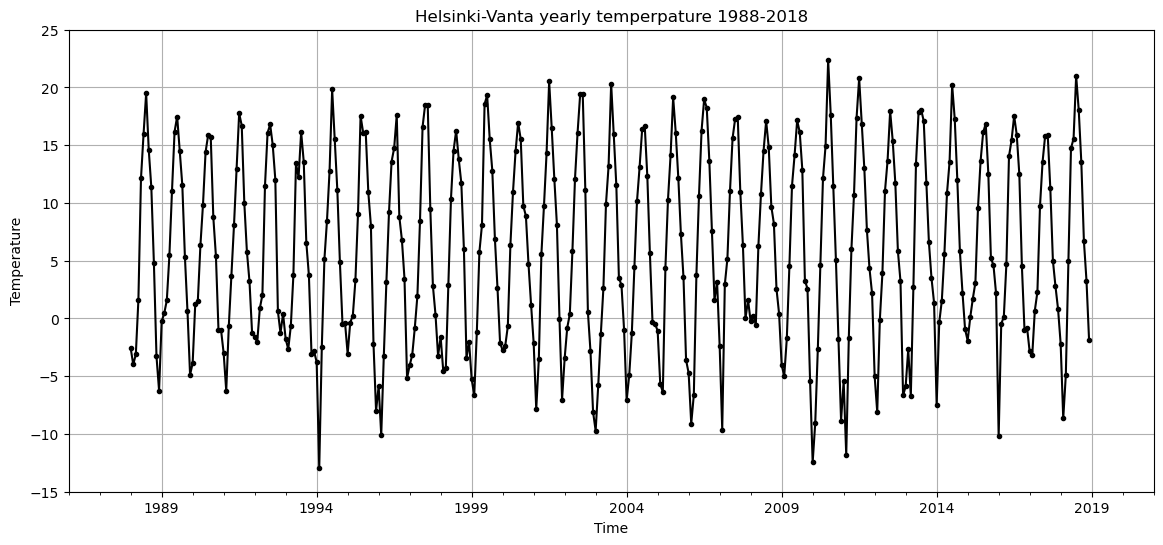

In [80]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 6]
selection = selection.sort_index(ascending=True)

ax = selection['TEMP_C'].plot(style='ok-', 
                              title='Helsinki-Vanta yearly temperpature 1988-2018', 
                              xlim=['19860101', '20210101'], 
                              ylim=[-15, 25],
                              markersize=3
                             )

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
plt.grid(True)

outputfp = 'temp_line_plot.png'
plt.savefig(outputfp)


In [76]:
outputfp = 'temp_line_plot.png'
ax.savefig(outputfp)

AttributeError: 'Axes' object has no attribute 'savefig'

In [ ]:
import os

#Check that output file exists (also open the file and check that the plot looks ok!)
os.path.exists(outputfp)

6: Upload your figure and the modified notebook into your personal GitHub repository.

### Done!

That's it, now you can move to problem 3. 